In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Функции для создания матриц
def create_projection_matrix(fov, aspect_ratio, near, far):
    f = 1.0 / np.tan(np.radians(fov) / 2)
    depth = near - far
    return np.array([
        [f / aspect_ratio, 0, 0, 0],
        [0, f, 0, 0],
        [0, 0, (far + near) / depth, (2 * far * near) / depth],
        [0, 0, -1, 0]
    ], dtype=float)

def create_view_matrix(camera_pos, target, up):
    forward = (camera_pos - target)
    forward /= np.linalg.norm(forward)
    right = np.cross(up, forward)
    right /= np.linalg.norm(right)
    up = np.cross(forward, right)

    view = np.identity(4, dtype=float)
    view[:3, :3] = np.stack([right, up, forward], axis=1)
    view[:3, 3] = -camera_pos
    return view

def create_model_matrix(translation, rotation, scale):
    # Матрица трансляции
    model = np.identity(4, dtype=float)
    model[:3, 3] = translation

    # Матрицы вращения вокруг осей X, Y и Z
    cx, cy, cz = np.cos(rotation)
    sx, sy, sz = np.sin(rotation)

    rotation_x = np.array([
        [1, 0, 0],
        [0, cx, -sx],
        [0, sx, cx]
    ], dtype=float)

    rotation_y = np.array([
        [cy, 0, sy],
        [0, 1, 0],
        [-sy, 0, cy]
    ], dtype=float)

    rotation_z = np.array([
        [cz, -sz, 0],
        [sz, cz, 0],
        [0, 0, 1]
    ], dtype=float)

    # Общая матрица вращения (умножение матриц вращения по всем осям)
    rotation_matrix = rotation_z @ rotation_y @ rotation_x

    # Матрица масштабирования
    scale_matrix = np.diag([scale[0], scale[1], scale[2], 1.0])

    # Вставляем матрицу вращения и масштабирования в итоговую матрицу модели
    model[:3, :3] = rotation_matrix @ scale_matrix[:3, :3]

    return model

# Определение вершин куба
cube_vertices = np.array([
    [-1, -1, -1, 1],
    [1, -1, -1, 1],
    [1, 1, -1, 1],
    [-1, 1, -1, 1],
    
    [-1, -1, 1, 1],
    [1, -1, 1, 1],
    [1, 1, 1, 1],
    [-1, 1, 1, 1]
], dtype=float)

# Определение линий куба (индексы вершин)
cube_edges = [(0, 1), (1, 2), (2, 3), (3, 0),
              (4, 5), (5, 6), (6, 7), (7, 4),
              (0, 4), (1, 5), (2, 6), (3, 7)]

# Параметры камеры и проекции
camera_pos = np.array([0, 0, -4], dtype=float)
target = np.array([0, 0, 0], dtype=float)
up = np.array([0, 1, 0], dtype=float)

fov = 90
aspect_ratio = 1
near = 0.1
far = 100

# Создание матриц
projection_matrix = create_projection_matrix(fov, aspect_ratio, near, far)
view_matrix = create_view_matrix(camera_pos, target, up)
model_matrix = create_model_matrix([0, 0, 0], [0, 0, 0], [1, 1, 1])

# Композиция матриц
transform_matrix = projection_matrix @ view_matrix @ model_matrix

# Преобразование вершин
transformed_vertices = (transform_matrix @ cube_vertices.T).T

# Проецирование в 2D
projected_vertices = transformed_vertices[:, :2] / transformed_vertices[:, 3][:, np.newaxis]

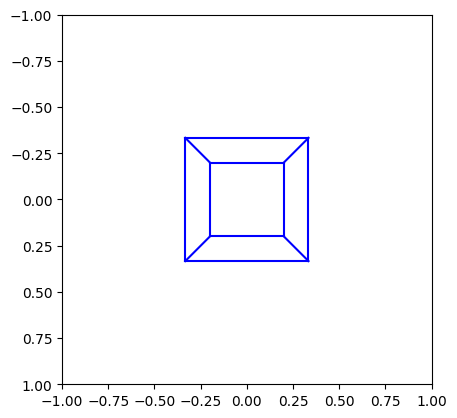

In [23]:
# Визуализация
fig, ax = plt.subplots()
for edge in cube_edges:
    points = projected_vertices[list(edge)]
    ax.plot(points[:, 0], points[:, 1], 'b')

ax.set_aspect('equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.gca().invert_yaxis()
plt.show()